In [1]:
import numpy as np
import pandas as pd
DF = pd.DataFrame
S = pd.Series

In [6]:
## str, str -> span of business days
def gen_span(t0,t1=None,n=None):
  return pd.date_range(start=t0,end=t1,periods=n,freq='B')
# print(gen_span('20140101','20190101'))
## n-step path via Laplace distribution
def gen_walk(n):
  steps = np.random.laplace(loc=0.,scale=1.,size=n)
  path = steps.cumsum()/np.sqrt(n)
  return path.round(3)
# print(DF(gen_walk()).describe())
## prices
def gen_prices(span,start=(10,100)):
  walk = gen_walk(len(span)) # treat as %-deltas
  price_0 = np.random.choice(range(*start)) # starting price
  prices = np.absolute( (1+walk) * price_0 ) # price trajectory
  return S(prices,span)
def gen_syms(ids):
  return ['sym_%s'%_id for _id in ids]
# -> DF {sym -> prices}
def gen_sym2price(span,syms):
  return DF({sym:gen_prices(span)
    for sym in syms})

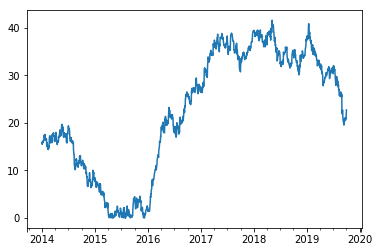

In [7]:
# span = gen_span('20140101','20190101')
span = gen_span('20140101',n=1500)
gen_prices(span).plot()

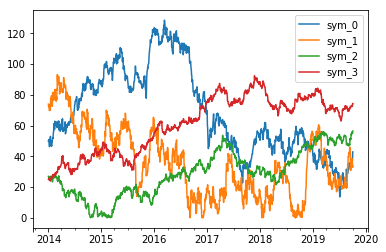

In [8]:
syms = gen_syms(range(4))
gen_sym2price(span,syms).plot()